In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("laptop.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.isnull().sum()#checking the null values

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [6]:
#from df.head() it is clear that column(Unnamed: 0.1, Unnamed: 0) is same column both are repeating index, so we can drop both the columns
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace = True)

In [7]:
df.shape#rows=1303,columns=11

(1303, 11)

In [8]:
df.head()#Removed both the useless columns

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df["Weight"].value_counts()

Weight
2.2kg     111
2.1kg      57
2.4kg      43
2.3kg      41
2.5kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: count, Length: 189, dtype: int64

In [10]:

# Replace '?' with pd.NA in dataframe
df.replace('?', pd.NA, inplace=True)


In [11]:
df['Inches'].value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [12]:
import pandas as pd

# Assuming df is your DataFrame

# Remove 'kg' from the 'Weight' column
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Remove 'GB' from the 'Ram' column
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

# Remove non-numeric characters from the 'Inches' column
df['Inches'] = df['Inches'].str.replace(r"[^\d.]", '')

# Convert the 'Inches' column to numeric
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')


In [13]:
#fill all the null values present in the columns 
# Identify object-type columns with missing values
object_columns_with_missing_values = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]

# Fill missing values in object-type columns with the most frequent value (mode)
df[object_columns_with_missing_values] = df[object_columns_with_missing_values].apply(lambda x: x.fillna(x.mode()[0]))

# Check for missing values after filling
print(df.isnull().sum())

Company              0
TypeName             0
Inches              31
ScreenResolution     0
Cpu                  0
Ram                 30
Memory               0
Gpu                  0
OpSys                0
Weight              31
Price               30
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1273 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.1+ KB


In [15]:
df.isnull().sum()

Company              0
TypeName             0
Inches              31
ScreenResolution     0
Cpu                  0
Ram                 30
Memory               0
Gpu                  0
OpSys                0
Weight              31
Price               30
dtype: int64

In [16]:
# Count duplicates in the DataFrame
duplicate_count = df.duplicated().sum()

print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 58


In [17]:
#Since there are 58 duplicate rows, we will drop the duplicate from the dataFrame
# Drop duplicates from the DataFrame
#keeping the first occurrence and modifying the DataFrame in place
df.drop_duplicates(keep='first', inplace=True)


# Confirm that duplicates have been dropped
print("Number of duplicate rows after dropping:", df.duplicated().sum())

# Now continue with your data processing and analysis using the cleaned DataFrame 'df'


Number of duplicate rows after dropping: 0


C:\Users\ayush\AppData\Local\Temp\ipykernel_7348\3149297850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"], kde=True, bins=5)


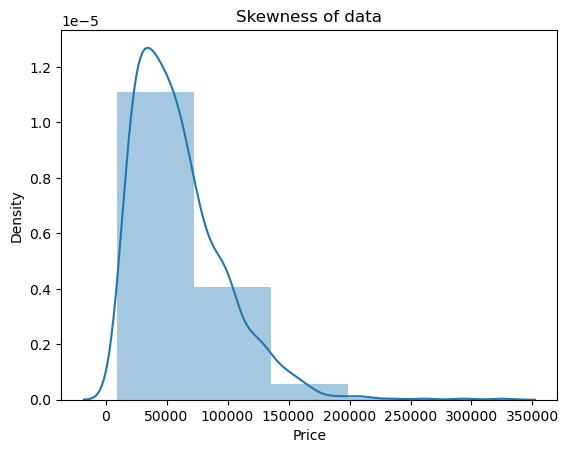

In [18]:
sns.distplot(df["Price"], kde=True, bins=5)
plt.title('Skewness of data')
plt.show()

In [19]:
#Since it is positively skewed Hence the use of Linear Models are not great for this data

<Axes: xlabel='Company', ylabel='Price'>

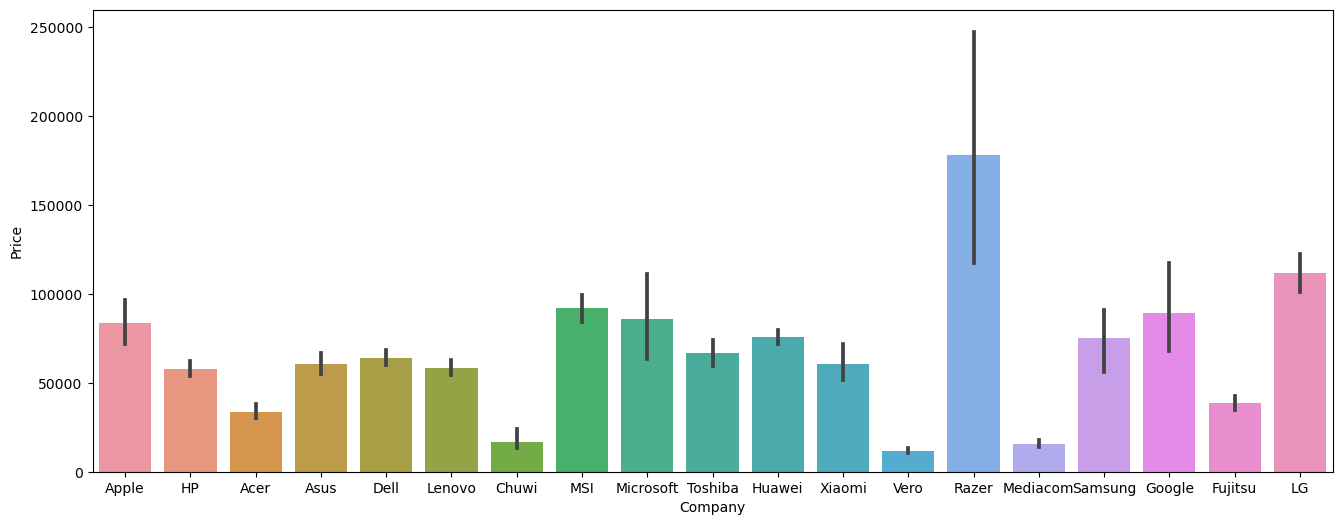

In [20]:
plt.figure(figsize=(16,6))
sns.barplot(x=df["Company"],y=df["Price"])

<Axes: xlabel='TypeName', ylabel='Price'>

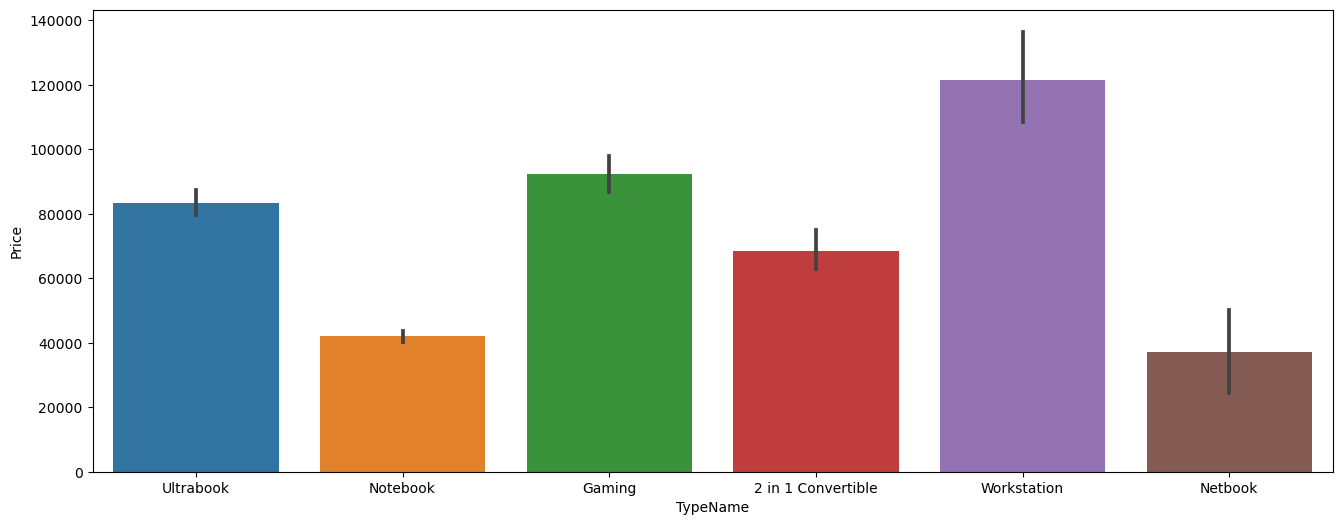

In [21]:
plt.figure(figsize=(16,6))
sns.barplot(x=df["TypeName"],y=df["Price"])

<Axes: xlabel='Inches', ylabel='Price'>

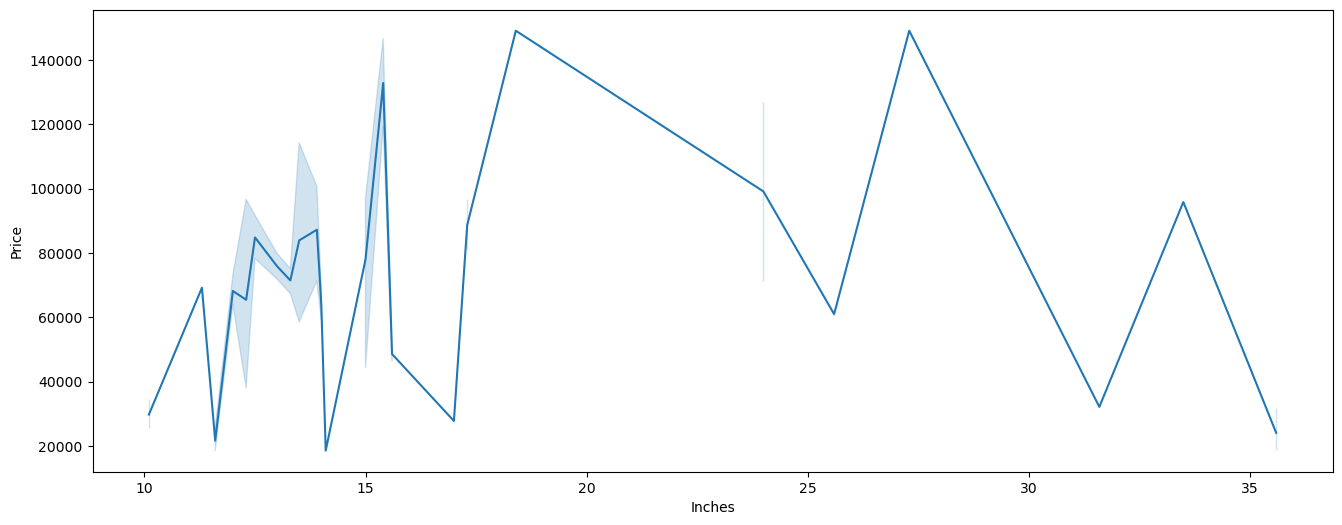

In [22]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df["Inches"],y=df["Price"])

In [23]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [24]:
# Extracting information from 'Cpu' column
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])  # Extracting CPU brand
df['Cpu_Type'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[1:-1]) if 'GHz' in x or 'MHz' in x else x.split()[1:])  # Extracting CPU type/model without speed
df['Cpu_Speed_GHz'] = df['Cpu'].apply(lambda x: float(x.split()[-1].replace('GHz', '')) if 'GHz' in x else float(x.split()[-1].replace('MHz', '')) / 1000)  # Extracting CPU speed in GHz


In [25]:
# Extracting information from 'Gpu' column
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])  # Extracting GPU brand
df['Gpu_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]))  # Extracting GPU model

In [26]:
# Extracting information from 'OpSys' column
df['Operating_System'] = df['OpSys'].apply(lambda x: x.split()[0])  # Extracting OS name

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1245 non-null   object 
 1   TypeName          1245 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1245 non-null   object 
 4   Cpu               1245 non-null   object 
 5   Ram               1244 non-null   float64
 6   Memory            1245 non-null   object 
 7   Gpu               1245 non-null   object 
 8   OpSys             1245 non-null   object 
 9   Weight            1243 non-null   float64
 10  Price             1244 non-null   float64
 11  Cpu_Brand         1245 non-null   object 
 12  Cpu_Type          1245 non-null   object 
 13  Cpu_Speed_GHz     1245 non-null   float64
 14  Gpu_Brand         1245 non-null   object 
 15  Gpu_Model         1245 non-null   object 
 16  Operating_System  1245 non-null   object 
dtype

In [28]:
df['Cpu_name'] = df['Cpu_Brand'] + ' ' + df['Cpu_Type']  # Merging CPU brand and type/model as Cpu_name
df.drop(columns=['Cpu', 'Cpu_Brand', 'Cpu_Type'], inplace=True)  # Dropping 'Cpu', 'Cpu_Brand', and 'Cpu_Type' columns


In [29]:
df.drop(columns=['OpSys'], inplace=True) 

In [30]:
# Define a function to extract memory types
def extract_memory_type(memory_str):
    if 'SSD' in memory_str:
        return 'SSD'
    elif 'HDD' in memory_str:
        return 'HDD'
    elif 'Hybrid' in memory_str:
        return 'Hybrid'
    elif 'Flash Storage' in memory_str:
        return 'SSD'  # Assume Flash Storage as SSD
    else:
        return 'Other'

# Create 'Memory_Type' column
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)







# Define a function to extract memory size
def extract_memory_size(memory_str):
    total_size = 0
    for part in memory_str.split('+'):
        part = part.strip()
        if 'TB' in part:
            total_size += float(part.split('TB')[0])
        elif 'GB' in part:
            total_size += float(part.split('GB')[0]) / 1024  # Convert GB to TB
    return total_size

# Create a new column 'Memory_Size' containing the total memory size
df['Memory_Size'] = df['Memory'].apply(lambda x: extract_memory_size(x))

# Drop the 'Memory' column
df.drop(columns=['Memory'], inplace=True)

In [31]:
# Extract screen type from 'ScreenResolution' column
df['Screen_Type'] = df['ScreenResolution'].apply(lambda x: x.split()[0])

# Extract resolution size from 'ScreenResolution' column
df['Resolution_Size'] = df['ScreenResolution'].apply(lambda x: x.split()[-1])

In [32]:
# Define a function to map the screen types
def map_screen_type(screen_type):
    if screen_type == '1920x1080':
        return '4K'
    elif screen_type == '2560x1440':
        return 'Quad'
    elif screen_type in ['1366x768', '1600x900', '1440x900']:
        return 'HD'
    else:
        return screen_type

# Apply the mapping function to 'Screen_Type'
df['Screen_Type'] = df['Screen_Type'].apply(map_screen_type)


In [33]:
# Define a function to extract screen type
def extract_screen_type(resolution_str):
    if 'Touchscreen' in resolution_str:
        return 'Touchscreen'
    else:
        return 'Non-Touchscreen'

# Create a new column 'Screen_Type' containing the screen type
df['Screen_Type'] = df['ScreenResolution'].apply(extract_screen_type)


In [34]:
# Replace "Mac" with "MacOS" in the 'Operating_System' column
df['Operating_System'] = df['Operating_System'].replace('MacOS', 'macOS')

In [35]:
df.drop(columns=['ScreenResolution','Gpu'], inplace=True) 

In [36]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Cpu_Speed_GHz,Gpu_Brand,Gpu_Model,Operating_System,Cpu_name,Memory_Type,Memory_Size,Screen_Type,Resolution_Size
0,Apple,Ultrabook,13.3,8.0,1.37,71378.6832,2.3,Intel,Iris Plus Graphics 640,macOS,Intel Core i5,SSD,0.125,Non-Touchscreen,2560x1600
1,Apple,Ultrabook,13.3,8.0,1.34,47895.5232,1.8,Intel,HD Graphics 6000,macOS,Intel Core i5,SSD,0.125,Non-Touchscreen,1440x900
2,HP,Notebook,15.6,8.0,1.86,30636.0000,2.5,Intel,HD Graphics 620,No,Intel Core i5 7200U,SSD,0.250,Non-Touchscreen,1920x1080
3,Apple,Ultrabook,15.4,16.0,1.83,135195.3360,2.7,AMD,Radeon Pro 455,macOS,Intel Core i7,SSD,0.500,Non-Touchscreen,2880x1800
4,Apple,Ultrabook,13.3,8.0,1.37,96095.8080,3.1,Intel,Iris Plus Graphics 650,macOS,Intel Core i5,SSD,0.250,Non-Touchscreen,2560x1600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1245 non-null   object 
 1   TypeName          1245 non-null   object 
 2   Inches            1243 non-null   float64
 3   Ram               1244 non-null   float64
 4   Weight            1243 non-null   float64
 5   Price             1244 non-null   float64
 6   Cpu_Speed_GHz     1245 non-null   float64
 7   Gpu_Brand         1245 non-null   object 
 8   Gpu_Model         1245 non-null   object 
 9   Operating_System  1245 non-null   object 
 10  Cpu_name          1245 non-null   object 
 11  Memory_Type       1245 non-null   object 
 12  Memory_Size       1245 non-null   float64
 13  Screen_Type       1245 non-null   object 
 14  Resolution_Size   1245 non-null   object 
dtypes: float64(6), object(9)
memory usage: 155.6+ KB


In [38]:
df.columns


Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Price',
       'Cpu_Speed_GHz', 'Gpu_Brand', 'Gpu_Model', 'Operating_System',
       'Cpu_name', 'Memory_Type', 'Memory_Size', 'Screen_Type',
       'Resolution_Size'],
      dtype='object')

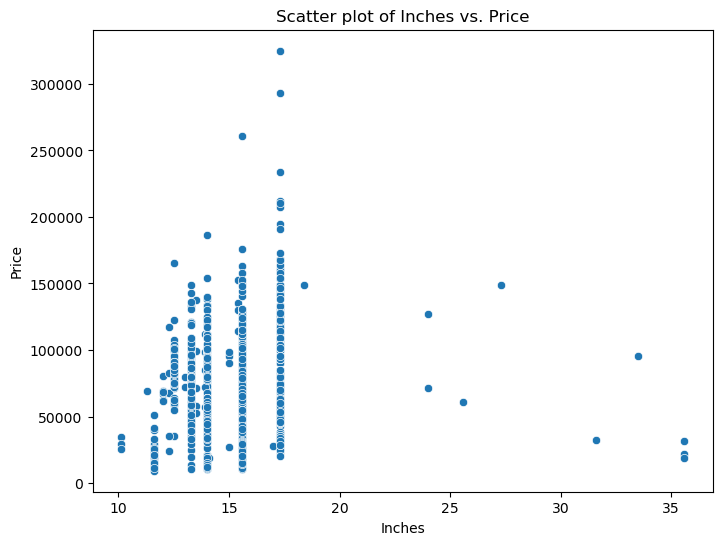

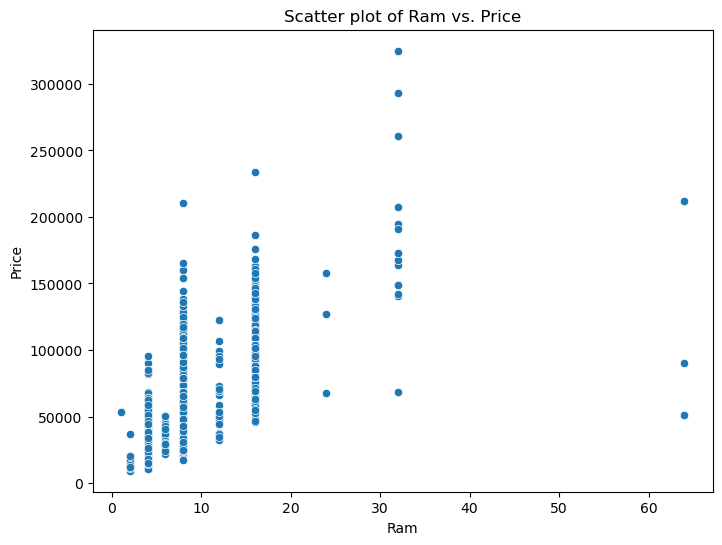

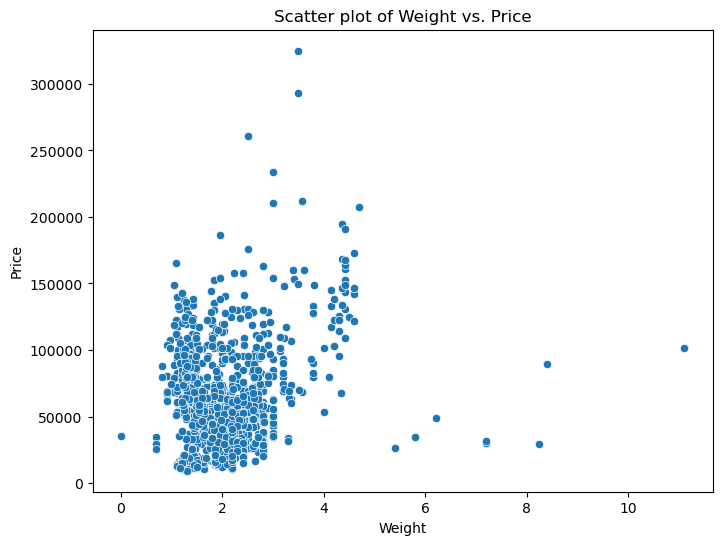

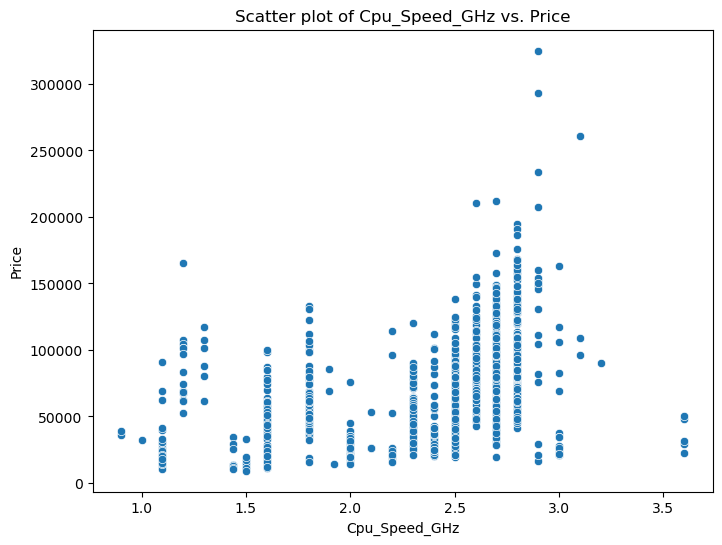

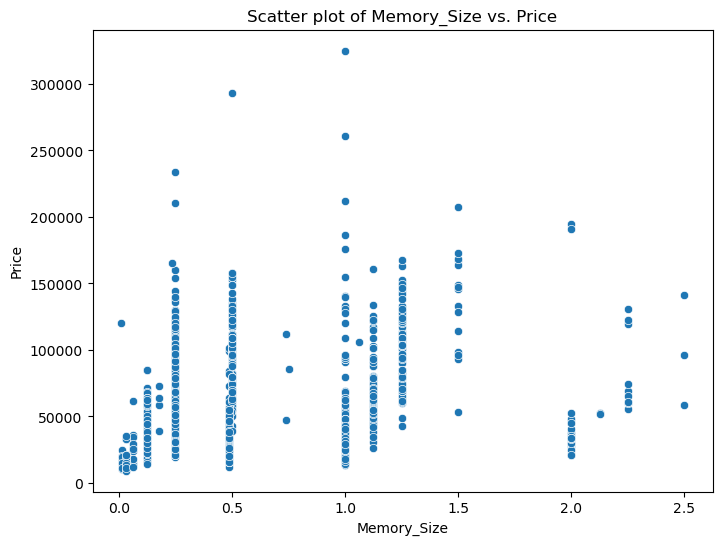

In [39]:
# Create scatter plots for numerical features
numerical_columns = ['Inches', 'Ram', 'Weight', 'Cpu_Speed_GHz', 'Memory_Size']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='Price')
    plt.title(f'Scatter plot of {column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

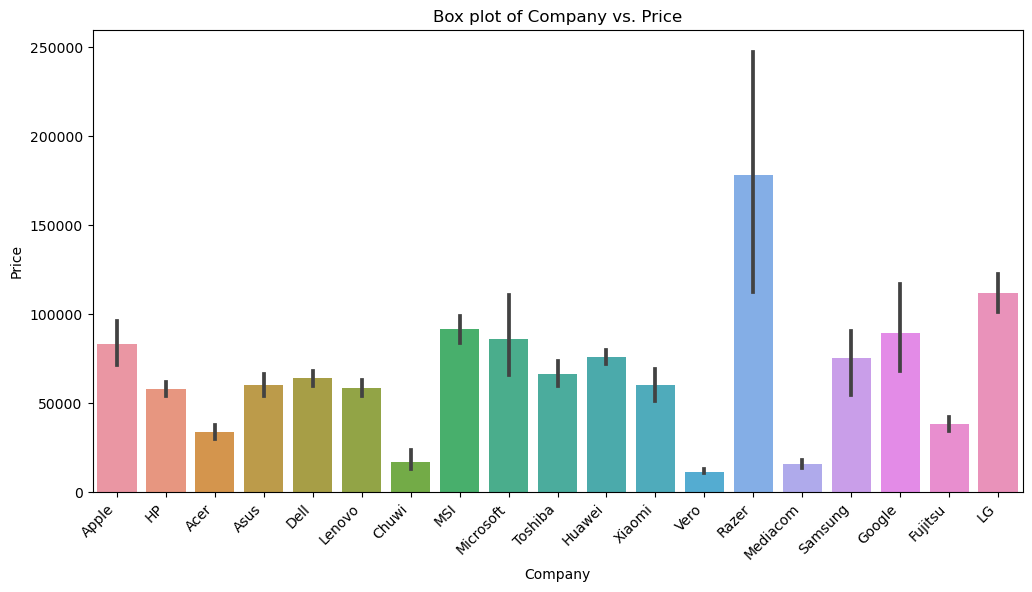

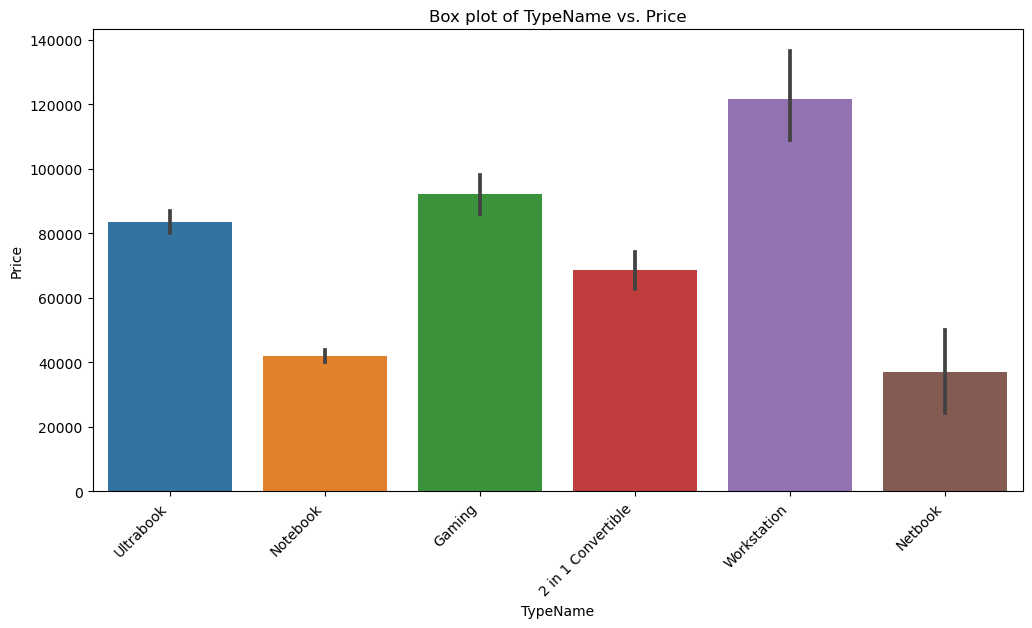

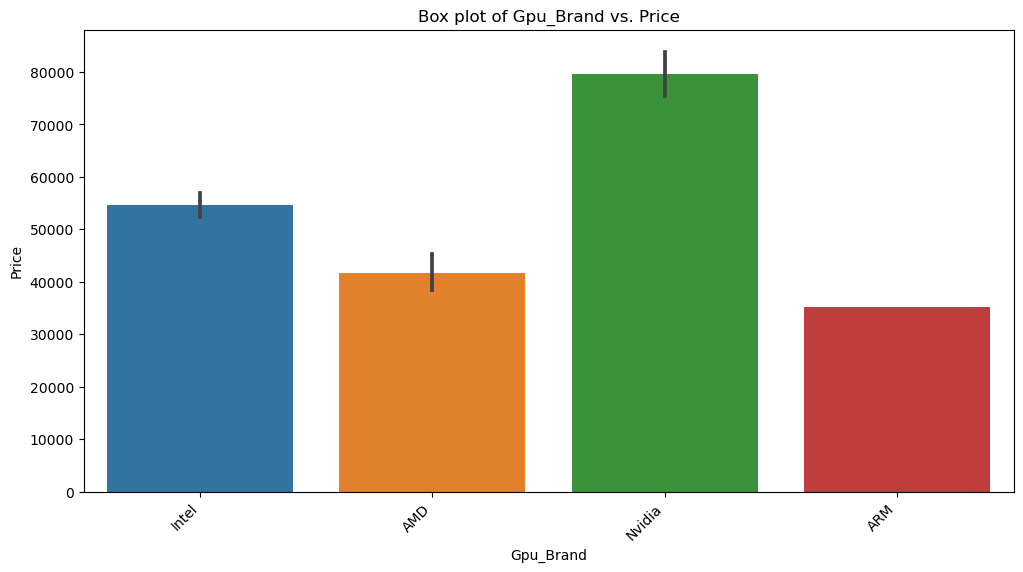

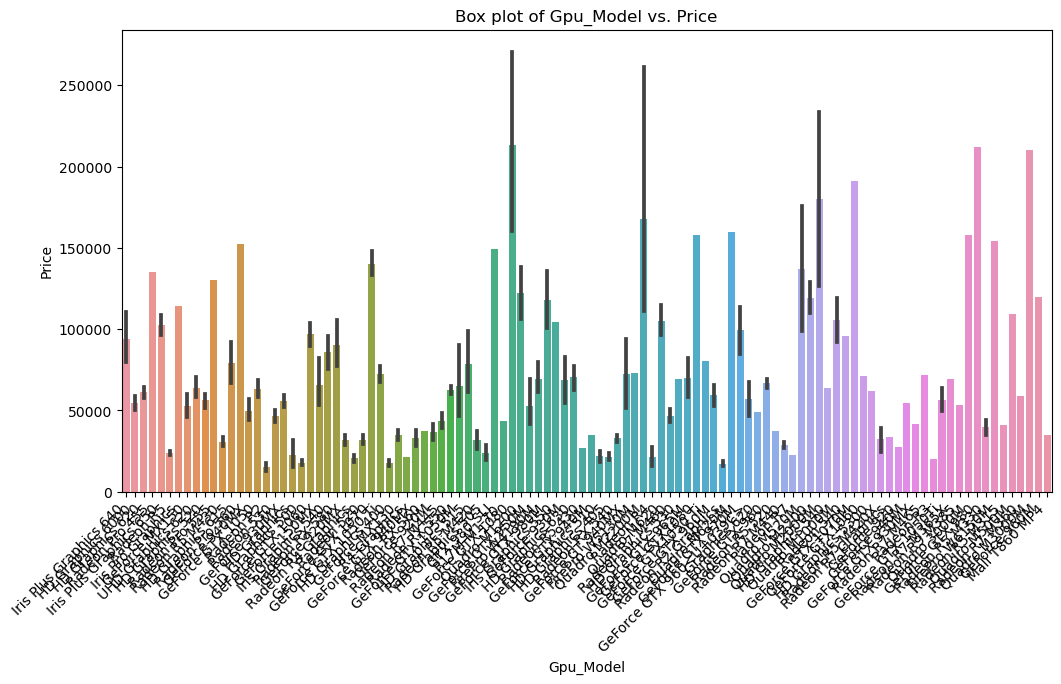

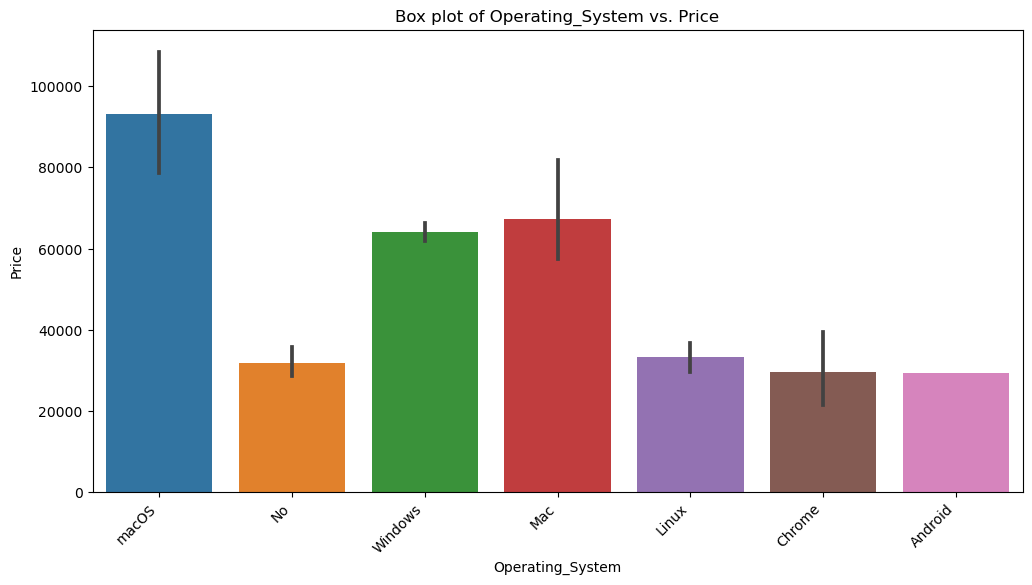

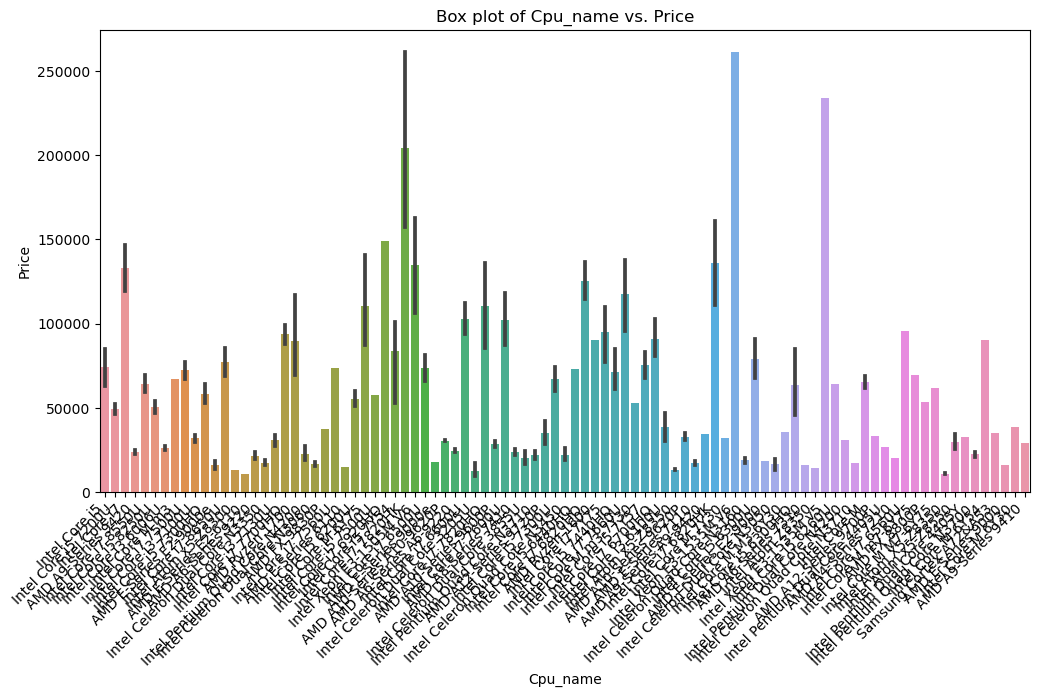

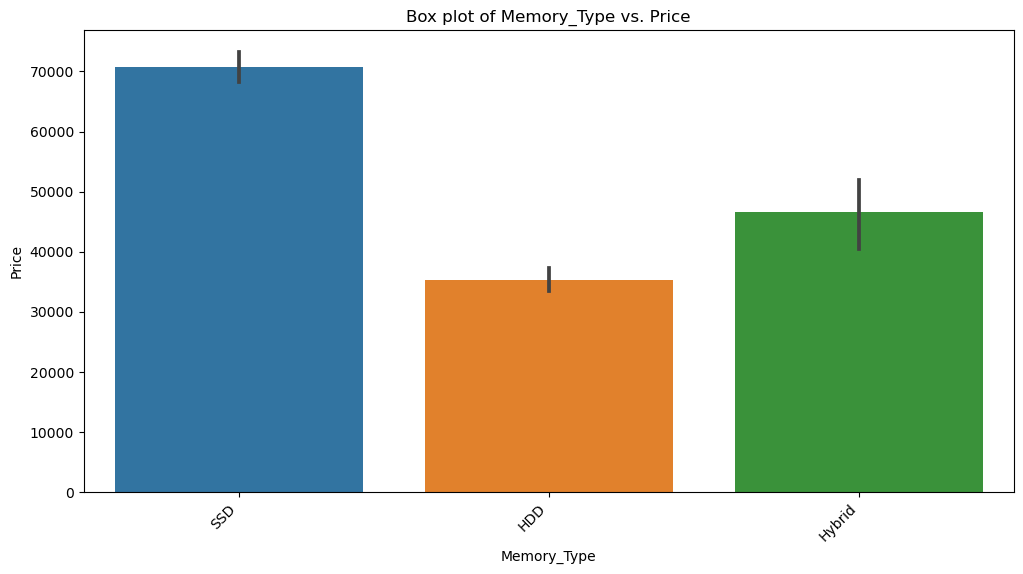

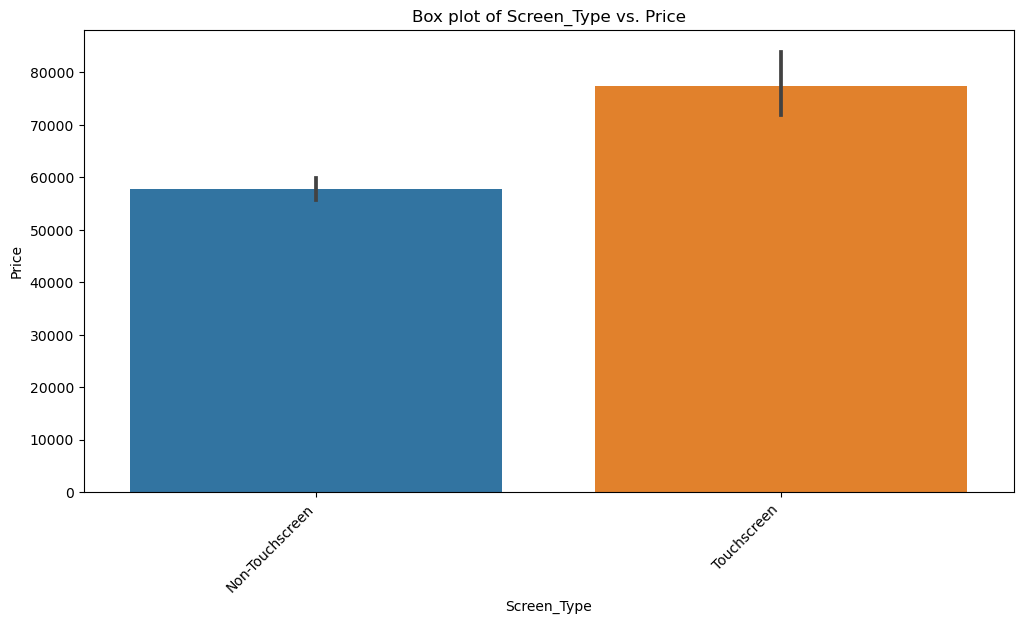

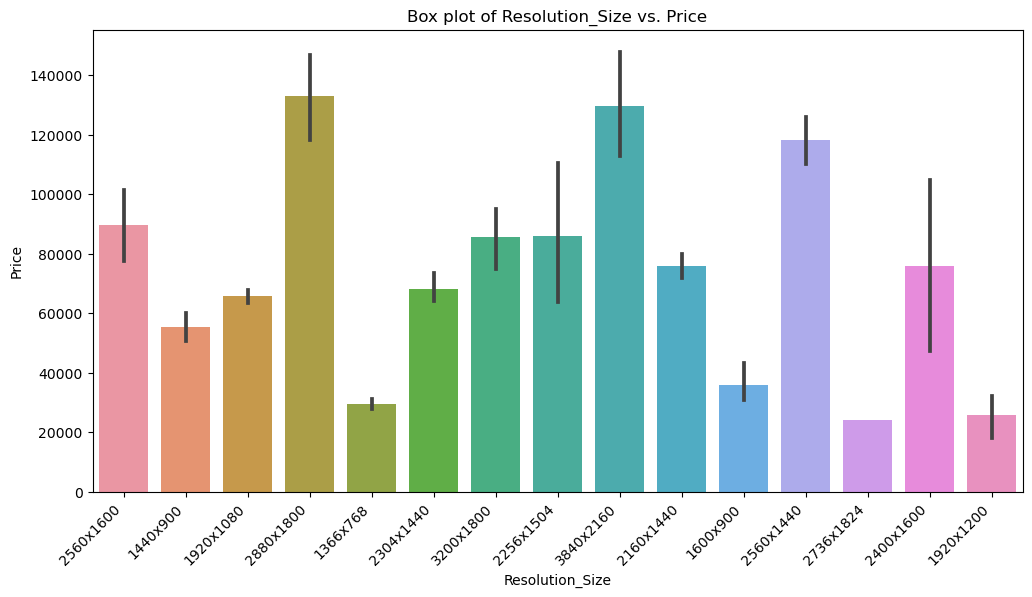

In [40]:
# Create box plots for categorical features
categorical_columns = ['Company', 'TypeName', 'Gpu_Brand', 'Gpu_Model', 'Operating_System', 'Cpu_name', 'Memory_Type', 'Screen_Type', 'Resolution_Size']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=column, y='Price')
    plt.title(f'Box plot of {column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

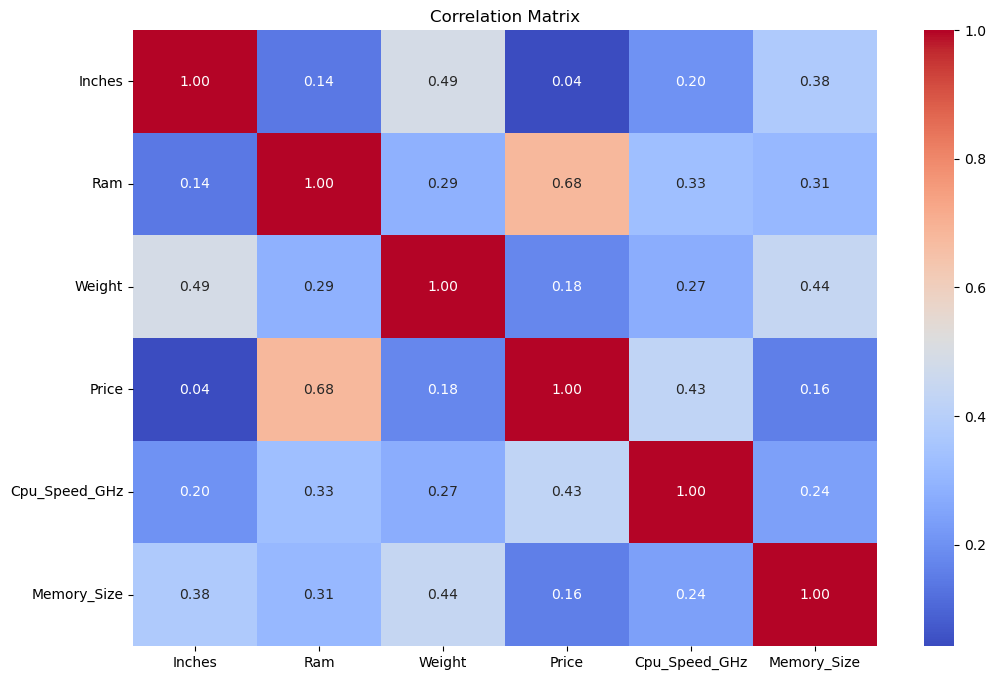

In [42]:
# Compute correlation matrix
# Select numerical columns for correlation analysis
numerical_columns = ['Inches', 'Ram', 'Weight', 'Price', 'Cpu_Speed_GHz', 'Memory_Size']

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [43]:
#Inches,weight,memory_size these columns has nearly 0 use in model training and predictions
# And also it shows Ram has the highest correlation with price.


In [44]:
df.isnull().sum()

Company             0
TypeName            0
Inches              2
Ram                 1
Weight              2
Price               1
Cpu_Speed_GHz       0
Gpu_Brand           0
Gpu_Model           0
Operating_System    0
Cpu_name            0
Memory_Type         0
Memory_Size         0
Screen_Type         0
Resolution_Size     0
dtype: int64

In [45]:
#Inches              2,Ram                 1,Weight              2,Price               1


<Axes: >

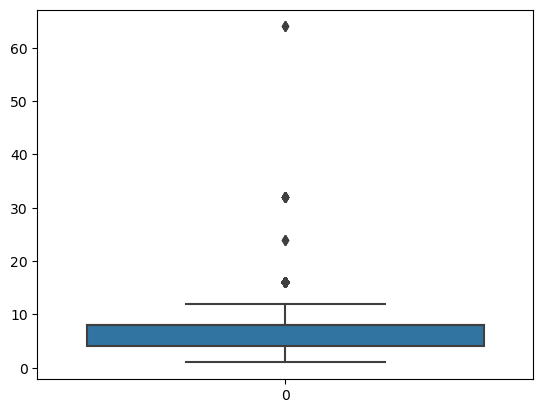

In [46]:
sns.boxplot(df["Ram"])

In [47]:
# Replace null values with median for numerical columns
numerical_columns = ['Inches', 'Ram', 'Weight', 'Price']
for column in numerical_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Confirm no null values remain
print("Null values after imputation:", df.isnull().sum().sum())

# Now, you can proceed with correlation analysis


Null values after imputation: 0


# Encoding

In [48]:
df1=df.copy()

In [49]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns using label encoding
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = label_encoder.fit_transform(df1[col]).astype(float)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Display encoded DataFrame
df1.head()



,Company,TypeName,Inches,Ram,Weight,Price,Cpu_Speed_GHz,Gpu_Brand,Gpu_Model,Operating_System,Cpu_name,Memory_Type,Memory_Size,Screen_Type,Resolution_Size
0,1.0,4.0,13.3,8.0,1.37,71378.6832,2.3,2.0,56.0,6.0,51.0,2.0,0.125,0.0,10.0
1,1.0,4.0,13.3,8.0,1.34,47895.5232,1.8,2.0,50.0,6.0,51.0,2.0,0.125,0.0,1.0
2,7.0,3.0,15.6,8.0,1.86,30636.0000,2.5,2.0,52.0,4.0,57.0,2.0,0.250,0.0,3.0
3,1.0,4.0,15.4,16.0,1.83,135195.3360,2.7,0.0,76.0,6.0,65.0,2.0,0.500,0.0,12.0
4,1.0,4.0,13.3,8.0,1.37,96095.8080,3.1,2.0,57.0,6.0,51.0,2.0,0.250,0.0,10.0


In [50]:
# outliers detection and treatment and,
# now proceed with feature scaling...




In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1245 non-null   float64
 1   TypeName          1245 non-null   float64
 2   Inches            1245 non-null   float64
 3   Ram               1245 non-null   float64
 4   Weight            1245 non-null   float64
 5   Price             1245 non-null   float64
 6   Cpu_Speed_GHz     1245 non-null   float64
 7   Gpu_Brand         1245 non-null   float64
 8   Gpu_Model         1245 non-null   float64
 9   Operating_System  1245 non-null   float64
 10  Cpu_name          1245 non-null   float64
 11  Memory_Type       1245 non-null   float64
 12  Memory_Size       1245 non-null   float64
 13  Screen_Type       1245 non-null   float64
 14  Resolution_Size   1245 non-null   float64
dtypes: float64(15)
memory usage: 187.9 KB


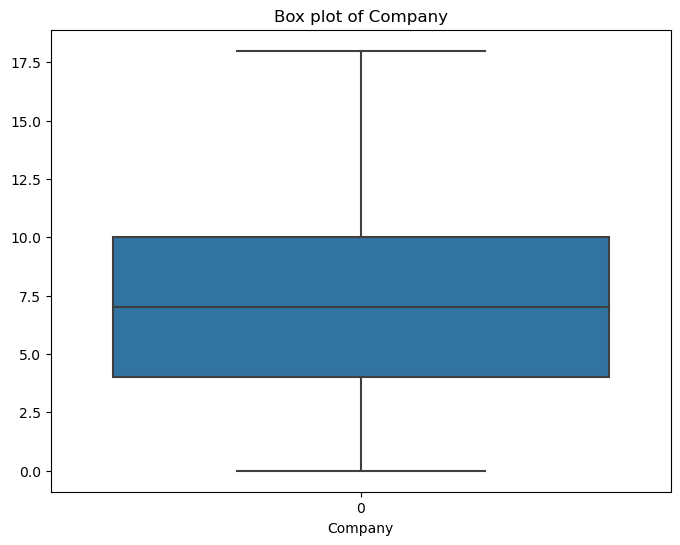

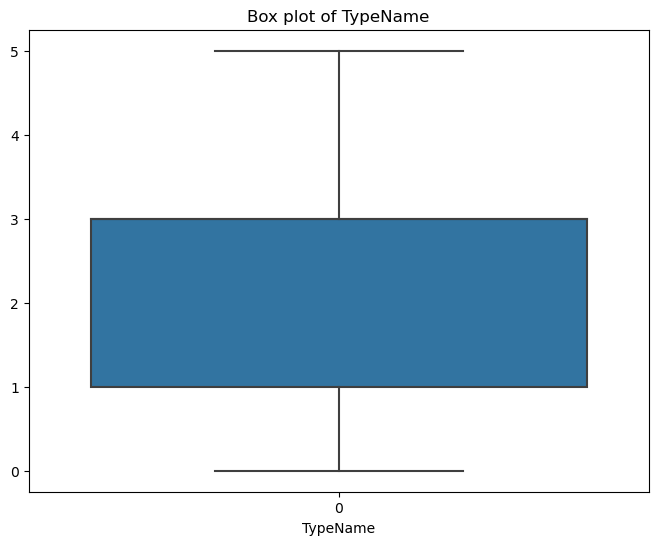

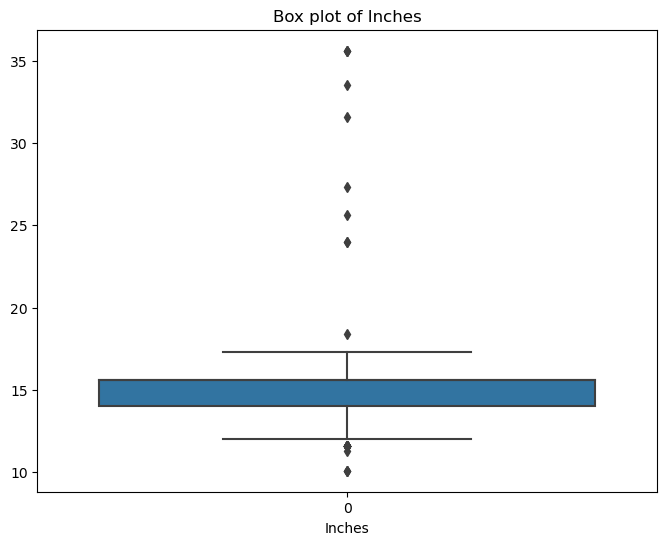

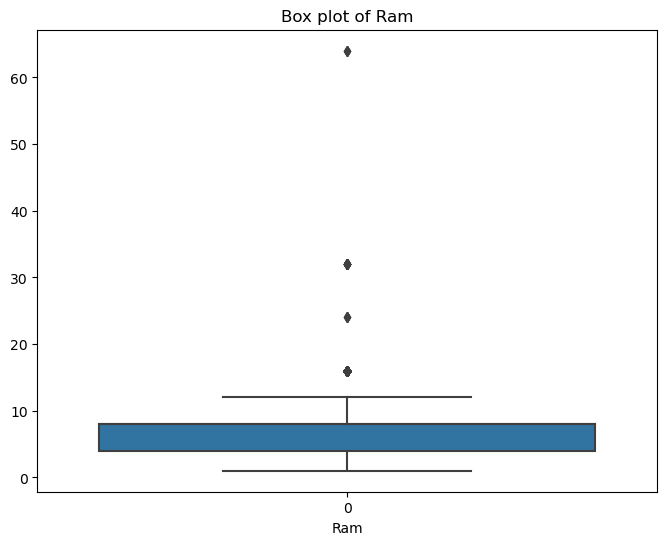

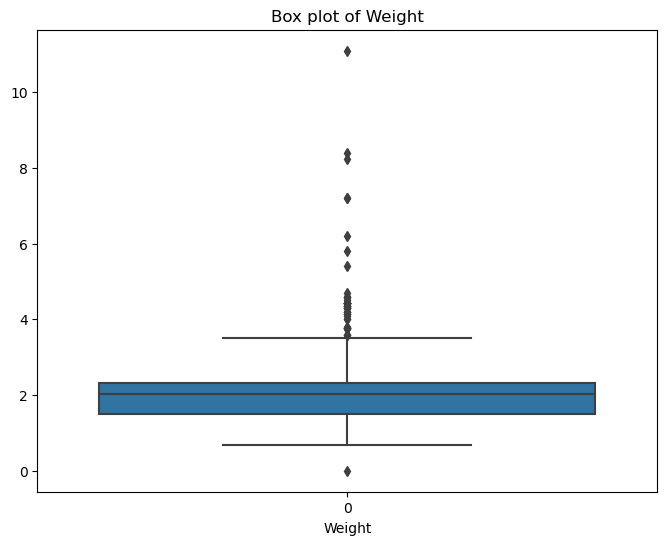

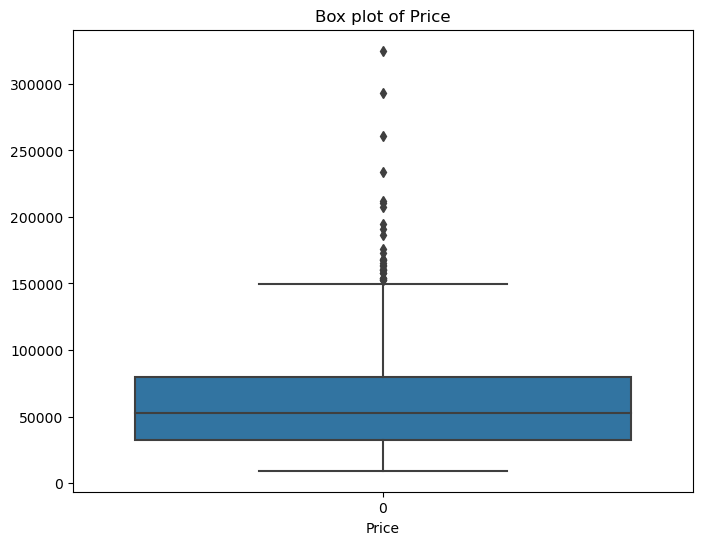

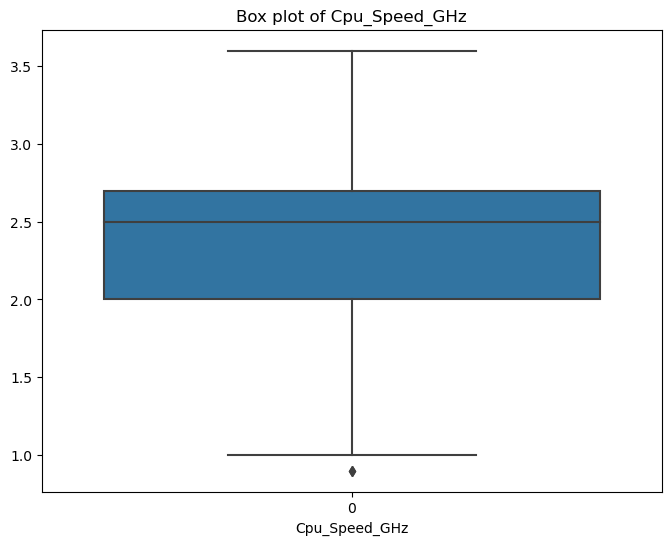

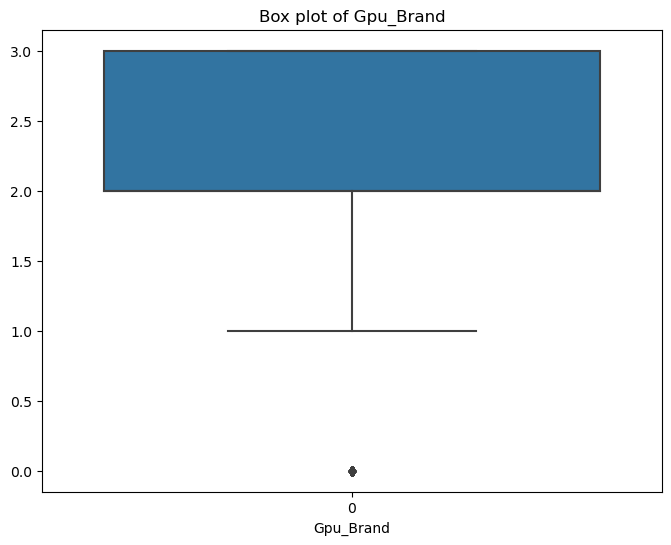

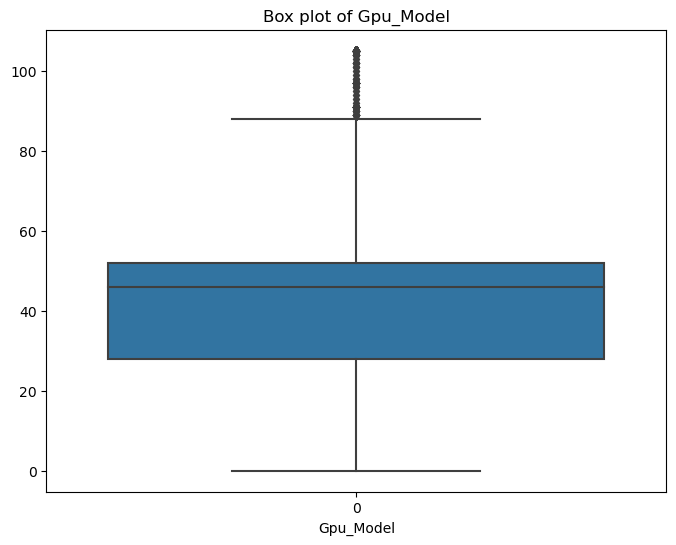

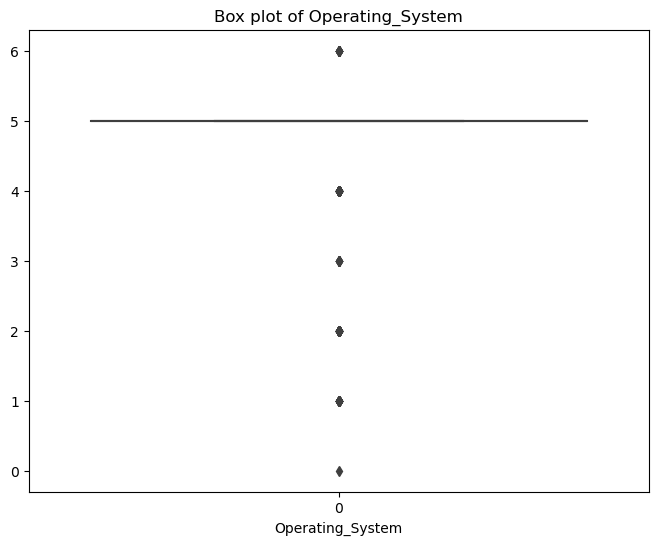

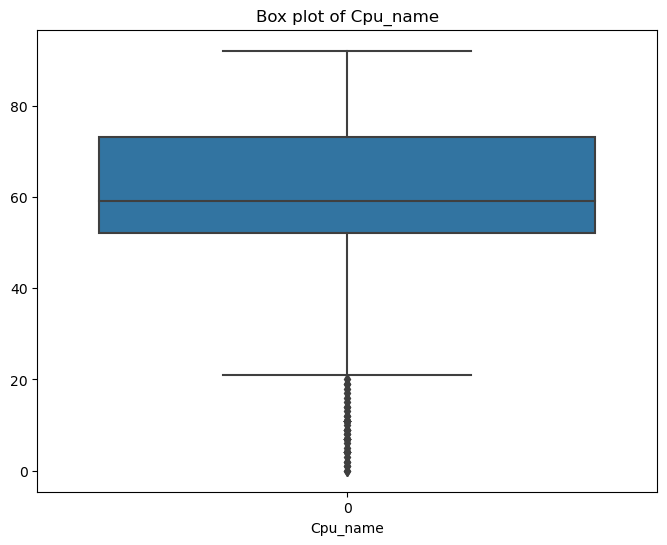

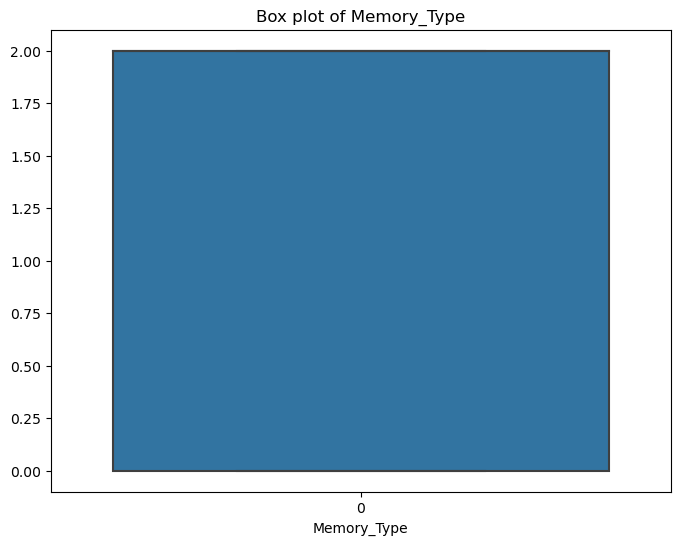

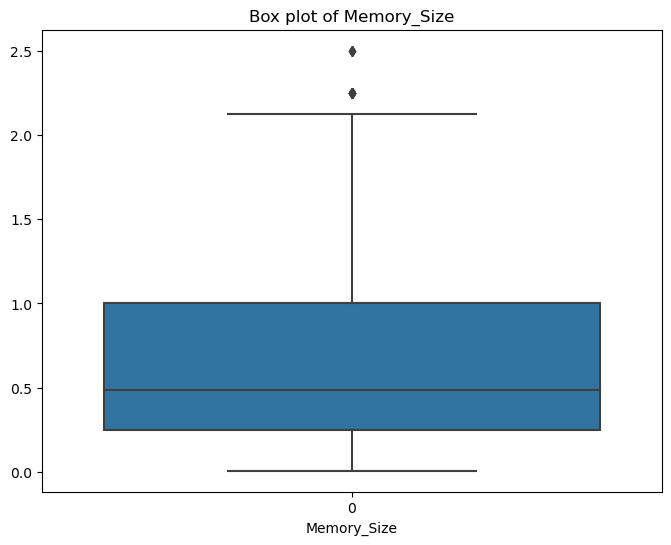

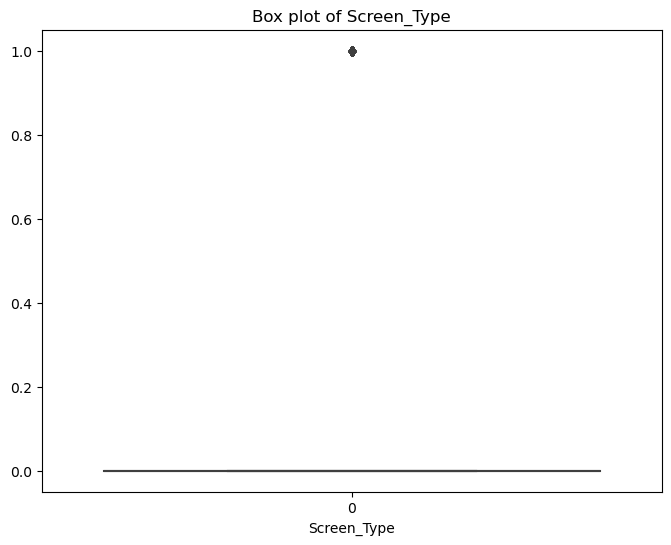

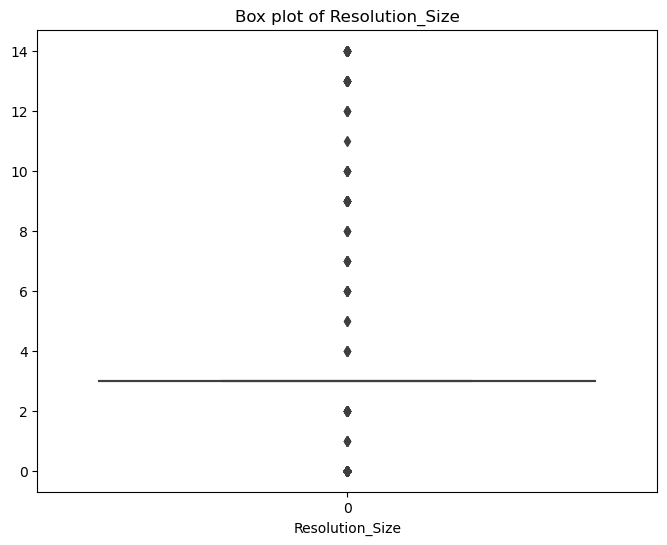

In [52]:
# Plot box plots for each encoded column
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df1[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()


In [53]:
# Define a function to cap outliers using the IQR method
def cap_outliers_iqr(df1, columns):
    """
    Capping outliers in the DataFrame using the Interquartile Range (IQR) method.

    """
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers outside the lower and upper bounds
        df1[column] = df1[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df1

# Specify the columns for which outliers should be capped
columns_to_cap_outliers = df1.columns

# Cap outliers using the IQR method
df_capped_outliers = cap_outliers_iqr(df1, columns_to_cap_outliers)

# Display the DataFrame after capping outliers
print("DataFrame after capping outliers using IQR method:")
df_capped_outliers.head()


DataFrame after capping outliers using IQR method:


,Company,TypeName,Inches,Ram,Weight,Price,Cpu_Speed_GHz,Gpu_Brand,Gpu_Model,Operating_System,Cpu_name,Memory_Type,Memory_Size,Screen_Type,Resolution_Size
0,1.0,4.0,13.3,8.0,1.37,71378.6832,2.3,2.0,56.0,5.0,51.0,2.0,0.125,0.0,3.0
1,1.0,4.0,13.3,8.0,1.34,47895.5232,1.8,2.0,50.0,5.0,51.0,2.0,0.125,0.0,3.0
2,7.0,3.0,15.6,8.0,1.86,30636.0000,2.5,2.0,52.0,5.0,57.0,2.0,0.250,0.0,3.0
3,1.0,4.0,15.4,14.0,1.83,135195.3360,2.7,0.5,76.0,5.0,65.0,2.0,0.500,0.0,3.0
4,1.0,4.0,13.3,8.0,1.37,96095.8080,3.1,2.0,57.0,5.0,51.0,2.0,0.250,0.0,3.0


# Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform feature scaling on df1
df1_scaled = scaler.fit_transform(df1)

# Convert the scaled array back to DataFrame
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Display the scaled DataFrame
df1_scaled.head()



,Company,TypeName,Inches,Ram,Weight,Price,Cpu_Speed_GHz,Gpu_Brand,Gpu_Model,Operating_System,Cpu_name,Memory_Type,Memory_Size,Screen_Type,Resolution_Size
0,0.055556,0.8,0.265625,0.538462,0.335843,0.439634,0.509434,0.6,0.636364,0.0,0.426573,1.0,0.055351,0.0,0.0
1,0.055556,0.8,0.265625,0.538462,0.326807,0.273408,0.320755,0.6,0.568182,0.0,0.426573,1.0,0.055351,0.0,0.0
2,0.388889,0.6,0.625000,0.538462,0.483434,0.151235,0.584906,0.6,0.590909,0.0,0.510490,1.0,0.114391,0.0,0.0
3,0.055556,0.8,0.593750,1.000000,0.474398,0.891363,0.660377,0.0,0.863636,0.0,0.622378,1.0,0.232472,0.0,0.0
4,0.055556,0.8,0.265625,0.538462,0.335843,0.614596,0.811321,0.6,0.647727,0.0,0.426573,1.0,0.114391,0.0,0.0


# Model training

In [55]:
#Random forest Regressor




from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



df1['Price_sqrt'] = np.sqrt(df1['Price'])

# Splitting features (X) and the transformed target variable (y)
X = df1.drop(columns=['Price', 'Price_sqrt'])  # Features
y = df1['Price_sqrt']  # Transformed target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the testing set
y_test_pred = rf_model.predict(X_test)

# Calculate RMSE on training and testing sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
from sklearn.metrics import r2_score


# Calculate R2 score on testing set
test_r2 = r2_score(y_test, y_test_pred)

print("Testing R2 score:", test_r2)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


Testing R2 score: 0.8706981006722043
Training RMSE: 10.447362204440815
Testing RMSE: 25.261060890584766


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_test_pred_gb = gb_model.predict(X_test)

# Calculate R2 score on testing set
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print("Gradient Boosting Testing R2 score:", test_r2_gb)


Gradient Boosting Testing R2 score: 0.8775944264486036


In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select only the specified columns for training
df1['Price_sqrt'] = np.sqrt(df1['Price'])

# Splitting features (X) and the transformed target variable (y)
X = df1.drop(columns=['Price', 'Price_sqrt'])  # Features
y = df1['Price_sqrt']  # Transformed target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Testing RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("Testing R2 score:", r2)


Testing RMSE: 24.74865542736534
Testing R2 score: 0.8758905214060392


# Q) Which features have the most significant impact on laptop prices?

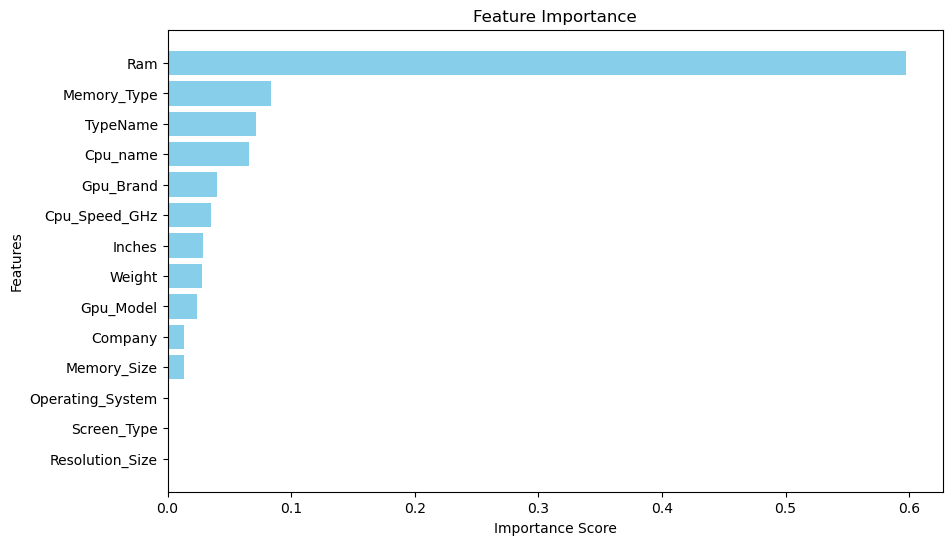

In [60]:
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
feature_importance = xgb_model.feature_importances_

# Create a dataframe to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()


# Hyperparameter Tuning 

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Assuming 'Price' is the target variable
# Select only the specified columns for training
df1['Price_sqrt'] = np.sqrt(df1['Price'])

# Splitting features (X) and the transformed target variable (y)
X = df1.drop(columns=['Price', 'Price_sqrt'])  # Features
y = df1['Price_sqrt']  # Transformed target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Create XGBoost regressor
xgb = XGBRegressor()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=500,
                                   cv=18, scoring='r2', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters found:", best_params)
print("Best R2 score found:", best_score)

# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Calculate R2 score on the test set
test_r2_score = r2_score(y_test, y_pred)
print("Testing R2 score:", test_r2_score)


Fitting 18 folds for each of 500 candidates, totalling 9000 fits
Best parameters found: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best R2 score found: 0.8762591519853987
Testing R2 score: 0.8939798172240526


# '''The best parameters found by the RandomizedSearchCV are:

subsample: 0.6
reg_lambda: 0.1
reg_alpha: 0.1
n_estimators: 500
min_child_weight: 1
max_depth: 7
learning_rate: 0.01
gamma: 0.1
colsample_bytree: 0.6
The best R2 score found during hyperparameter tuning is approximately 0.877, and the R2 score on the testing set is approximately 0.8939. This indicates that the model is performing well on unseen data and suggests that the hyperparameter tuning process has indeed improved the model's performance.





'''

 # Q)  Does the brand of the laptop significantly influence its price?
 # A) No.

In [62]:
importances = random_search.best_estimator_.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top N important features
top_n = 10  # Adjust this number to display the desired number of top features
top_features = feature_importance_df.head(top_n)

print("Top", top_n, "important features:")
print(top_features)
# Save the top features DataFrame to a CSV file
top_features.to_csv('top_features.csv', index=False)


Top 10 important features:
          Feature  Importance
3             Ram    0.351918
10    Memory_Type    0.171204
5   Cpu_Speed_GHz    0.124532
1        TypeName    0.075372
9        Cpu_name    0.070167
11    Memory_Size    0.045158
7       Gpu_Model    0.041617
4          Weight    0.036698
2          Inches    0.033537
6       Gpu_Brand    0.029624


# Final Model Training

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Splitting features (X) and the transformed target variable (y)
X = df1.drop(columns=['Price', 'Price_sqrt'])  # Features
y = df1['Price_sqrt']  # Transformed target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the best parameters found from RandomizedSearchCV
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.01,
    'gamma': 0.1,
    'colsample_bytree': 0.6
}

# Create XGBoost regressor with best parameters
final_xgb = XGBRegressor(**best_params)

# Train the final model
final_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_xgb.predict(X_test)

# Calculate R2 score on the test set
test_r2_score = r2_score(y_test, y_pred)
print("Final Testing R2 score:", test_r2_score)

# Save the final model
import pickle
with open('final_xgb_model.pkl', 'wb') as f:
    pickle.dump(final_xgb, f)


Final Testing R2 score: 0.9043882447750266


In [64]:
#final score after hyper parameter tuning is 90.4% accurate
